# Traffic accidents: Yucatán
## Regression
Source: INEGI

## Imports

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

sns.set(style="whitegrid")

## Reading and inspecting the data

In [28]:
accidents = pd.read_csv("indicadores_csv.csv", encoding="ISO-8859-1")
yuc = accidents[accidents.Entidad == "Yucatán"]

In [29]:
yuc.shape

(63, 12)

In [30]:
yuc.head(3)

,Indicador,Nombre Indicador,Clave área geográfica,Entidad,Municipio,Periodo,Valor,Excepción,Unidad de medida,Frecuencia,Information Status,Referencias
347,6200009438,Víctimas muertas en los accidentes de tránsito,31,Yucatán,Estatal,1997,80,NaN,NaN,Anual,3,/b /c /f1 /d
348,6200009438,Víctimas muertas en los accidentes de tránsito,31,Yucatán,Estatal,1998,41,NaN,NaN,Anual,3,/b /c /f1 /d
349,6200009438,Víctimas muertas en los accidentes de tránsito,31,Yucatán,Estatal,1999,78,NaN,NaN,Anual,3,/b /c /f1 /d


In [31]:
yuc["Nombre Indicador"].unique()

array(['Víctimas muertas en los accidentes de tránsito',
       'Accidentes de tránsito terrestre en zonas urbanas y suburbanas',
       'Víctimas heridas en los accidentes de tránsito'], dtype=object)

In [32]:
yuc.Periodo.unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int64)

## Splitting the data

In [52]:
yuc_accidents = yuc[yuc.Indicador == 1006000039]
yuc_injured = yuc[yuc.Indicador == 6200009439]
yuc_deadly = yuc[yuc.Indicador == 6200009438]

## Getting information

In [54]:
print(f"Accidentes: {yuc_accidents.Valor.sum()}\nVictimas heridas: {yuc_injured.Valor.sum()}\nMuertos: {yuc_deadly.Valor.sum()}")

Accidentes: 119692
Victimas heridas: 81090
Muertos: 1514


### Probability of getting injured if you suffer an accident

In [163]:
prob_inj = (yuc_injured.Valor.sum() / yuc_accidents.Valor.sum()) * 100
print(f"{round(prob_inj, 2)}%")

67.75%


### Probability of dying if you suffer an accident

In [162]:
prob_ded = (yuc_deadly.Valor.sum() / yuc_accidents.Valor.sum()) * 100
print(f"{round(prob_ded, 2)}%")

1.26%


### Years with the least and most amount of accidents and dead

In [351]:
print(yuc_accidents.Valor.sort_values().head(1)) # least
print(yuc_accidents.Valor.sort_values().tail(1)) # most

print(yuc_deadly.Valor.sort_values().head(1)) # least
print(yuc_deadly.Valor.sort_values().tail(1)) # most

468    3600
Name: Valor, dtype: int64
478    7662
Name: Valor, dtype: int64
348    41
Name: Valor, dtype: int64
427    124
Name: Valor, dtype: int64


In [360]:
print(f"Year with most amount of accidents: {yuc_accidents.loc[478].Periodo}")
print(f"Year with least amount accidents: {yuc_accidents.loc[468].Periodo}")

print(f"Year with most amount of deceased: {yuc_deadly.loc[427].Periodo}")
print(f"Year with least amount of deceased: {yuc_deadly.loc[348].Periodo}")

Year with most amount of accidents: 2008
Year with least amount accidents: 1998
Year with most amount of deceased: 2002
Year with least amount of deceased: 1998


## Visualizing

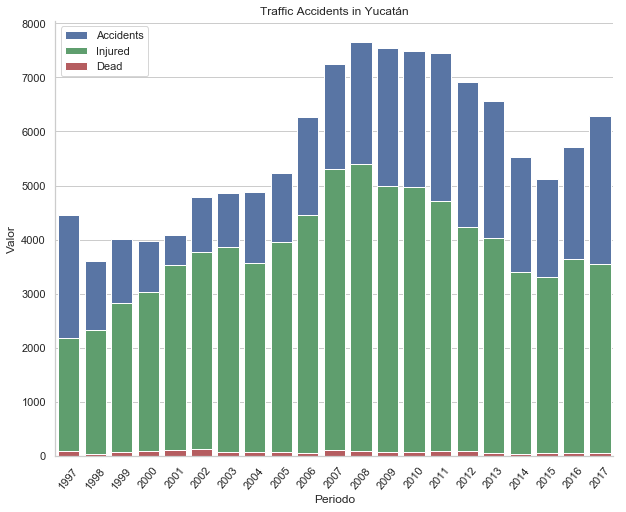

In [361]:
fig, ax = plt.subplots(figsize=(10,8))

sns.barplot(x="Periodo", y="Valor", data=yuc_accidents, color="b", label="Accidents")
sns.barplot(x="Periodo", y="Valor", data=yuc_injured, color="g", label="Injured")
sns.barplot(x="Periodo", y="Valor", data=yuc_deadly, color="r", label="Dead")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title("Traffic Accidents in Yucatán")
ax.legend(ncol=1, loc="upper left", frameon=True)
ax.set_xticklabels(yuc.Periodo.unique(), rotation=50)

plt.show()
#fig.savefig("traffic_accidents_yucatan", bbox_inches="tight", pad_inches=0.5)

## Regression

In [194]:
yuc_accidents.head(3)

,Indicador,Nombre Indicador,Clave área geográfica,Entidad,Municipio,Periodo,Valor,Excepción,Unidad de medida,Frecuencia,Information Status,Referencias
468,1006000039,Accidentes de tránsito terrestre en zonas urba...,31,Yucatán,Estatal,1998,3600,NaN,NaN,Anual,3,/a /b /c /f1
469,1006000039,Accidentes de tránsito terrestre en zonas urba...,31,Yucatán,Estatal,1999,4009,NaN,NaN,Anual,3,/a /b /c /f1
470,1006000039,Accidentes de tránsito terrestre en zonas urba...,31,Yucatán,Estatal,2000,3972,NaN,NaN,Anual,3,/a /b /c /f1


In [293]:
X = yuc_accidents.iloc[:, 5:6].values
y = yuc_accidents.iloc[:, 6].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear regression
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)

y_pred = reg_lin.predict(X_test)

# Polynomial regression
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)

lin_reg_2 = LinearRegression().fit(X_poly, y_train)

y_pred_poly = lin_reg_2.predict(poly_reg.fit_transform(X_test))

# Random forest regression
reg_for = RandomForestRegressor(n_estimators=100, random_state=0)
reg_for.fit(X_train, y_train)

y_pred_for = reg_for.predict(X_test)

### Predictions

In [297]:
print(f"Linear reression predictions: {y_pred}")
print(f"Polynomial regression predictions: {y_pred_poly}")
print(f"Random forest predictions: {y_pred_for}")

Linear reression predictions: [5435.1424122  6087.20985931 6869.69079583 4522.24798625 5826.38288046]
Polynomial regression predictions: [6158.776577   7256.65428925 3499.23449707 3909.91096115 7095.72902679]
Random forest predictions: [5830.28 7241.04 5558.84 3727.36 7553.63]


### Actual y_test

In [298]:
print(f"Actual y values: {y_pred}")

Actual y values: [5435.1424122  6087.20985931 6869.69079583 4522.24798625 5826.38288046]


### Accuracy

In [304]:
print(f"Variance score linear regressor: {explained_variance_score(y_test, y_pred)}")
print(f"Variance score polynomial regressor: {explained_variance_score(y_test, y_pred_poly)}")
print(f"Variance score random forest: {explained_variance_score(y_test, y_pred_for)}")

print(f"r2 score linear regressor: {r2_score(y_test, y_pred)}")
print(f"r2 score polynomial regressor: {r2_score(y_test, y_pred_poly)}")
print(f"r2 score random forest regressor: {r2_score(y_test, y_pred_for)}")

Variance score linear regressor: 0.4458834189029788
Variance score polynomial regressor: 0.33240782678250613
Variance score random forest: 0.9617031252398403
r2 score linear regressor: 0.2502832763824657
r2 score polynomial regressor: 0.006205866746518129
r2 score random forest regressor: 0.8949357409232581


### Visualizing

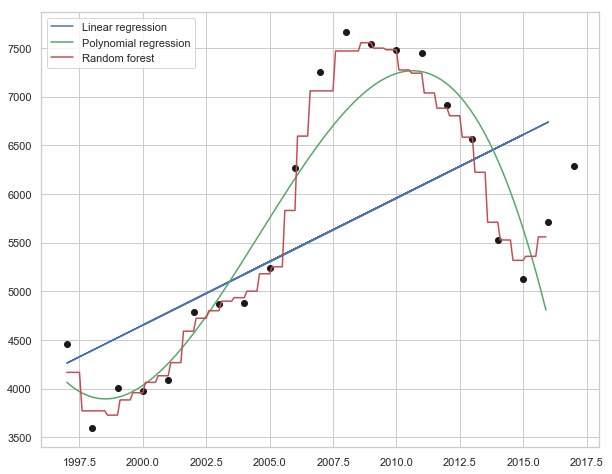

In [362]:
fig, ax = plt.subplots(figsize=(10,8))

X_grid = np.arange(min(X_train), max(X_train), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

ax.scatter(X, y, color="k")
ax.plot(X_train, reg_lin.predict(X_train), color="b", label="Linear regression")
ax.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color="g", label="Polynomial regression")
ax.plot(X_grid, reg_for.predict(X_grid), color="r", label="Random forest")

ax.legend(ncol=1, loc="upper left", frameon=True)
plt.show()
#fig.savefig("traffic_accidents_regressors", bbox_inches="tight", pad_inches=0.5)

### Predicting the future

In [328]:
print(f"Number of predicted accidents for 2018 (linear): {reg_lin.predict(np.atleast_2d(2018))}")
print(f"Number of predicted accidents for 2018 (linear): {reg_lin.predict(np.atleast_2d(2019))}")
print(f"Number of predicted accidents for 2018 (forest): {reg_for.predict(np.atleast_2d(2018))}")
print(f"Number of predicted accidents for 2019 (forest): {reg_for.predict(np.atleast_2d(2019))}")

Number of predicted accidents for 2018 (linear): [7000.10428525]
Number of predicted accidents for 2018 (linear): [7130.51777468]
Number of predicted accidents for 2018 (forest): [5558.84]
Number of predicted accidents for 2019 (forest): [5558.84]
